In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import spearmanr

EFD and GDP

Spearman Rank Correlation: 0.3025
P-value: 4.2238e-04
The correlation is statistically significant.
Mean Spearman Correlation Coefficient: 0.2773
Standard Deviation of Spearman Correlation Coefficients: 0.0326


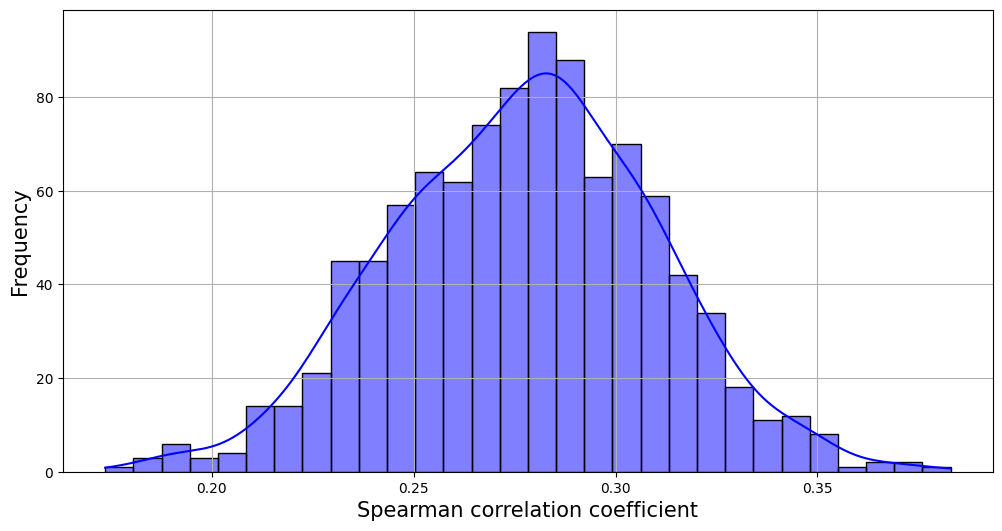

In [3]:
# Calculate Spearman rank correlation

# Load the datasets
df1 = pd.read_csv('High_income_total_damage_per_country_1990_2022.csv')
df2 = pd.read_csv('Upper_middle_income_total_damage_per_country_1990_2022.csv')
df3 = pd.read_csv('Lower_middle_income_total_damage_per_country_1990_2022.csv')
df4 = pd.read_csv('Low_income_total_damage_per_country_1990_2022.csv')

df = pd.concat([df1, df2, df3, df4])

Df= pd.read_csv('Average_gdp.csv')

# Merge the datasets on the 'Entity' column
merged_df = pd.merge(df, Df, on='Entity')

# Select relevant columns and add an income category column
data = merged_df[['Total Damage per Country (\'000 US$)', 'GDP', 'Income_y','Entity']].dropna()
spearman_corr, p_value = spearmanr(data['GDP'], 
                                   data['Total Damage per Country (\'000 US$)'])

# Print the results
print(f"Spearman Rank Correlation: {spearman_corr:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Sensitivity analysis using Monte Carlo simulation
n_iterations = 1000  # Number of Monte Carlo iterations
spearman_coefficients = []

# Perform Monte Carlo simulation
for _ in range(n_iterations):
    # Add random noise to the GDP data
    noise = np.random.normal(0, data['GDP'].std() * 0.1, 
                              size=len(data['GDP']))
    perturbed_gdp = data['GDP'] + noise
    
    # Calculate Spearman correlation for perturbed data
    corr, _ = spearmanr(perturbed_gdp, data['Total Damage per Country (\'000 US$)'])
    spearman_coefficients.append(corr)

# Analyze the distribution of Spearman coefficients
spearman_coefficients = np.array(spearman_coefficients)

# Plot the distribution of Spearman coefficients
plt.figure(figsize=(12, 6))
sns.histplot(spearman_coefficients, bins=30, kde=True, color='blue')
plt.xlabel('Spearman correlation coefficient', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.savefig('Spearman_GDP_vs_Damage.png')

# Summary statistics
mean_corr = np.mean(spearman_coefficients)
std_corr = np.std(spearman_coefficients)
print(f"Mean Spearman Correlation Coefficient: {mean_corr:.4f}")
print(f"Standard Deviation of Spearman Correlation Coefficients: {std_corr:.4f}")

EFD and GHG

Spearman Rank Correlation: 0.3172
P-value: 2.1021e-04
The correlation is statistically significant.
Mean Spearman Correlation Coefficient: 0.2411
Standard Deviation of Spearman Correlation Coefficients: 0.0426


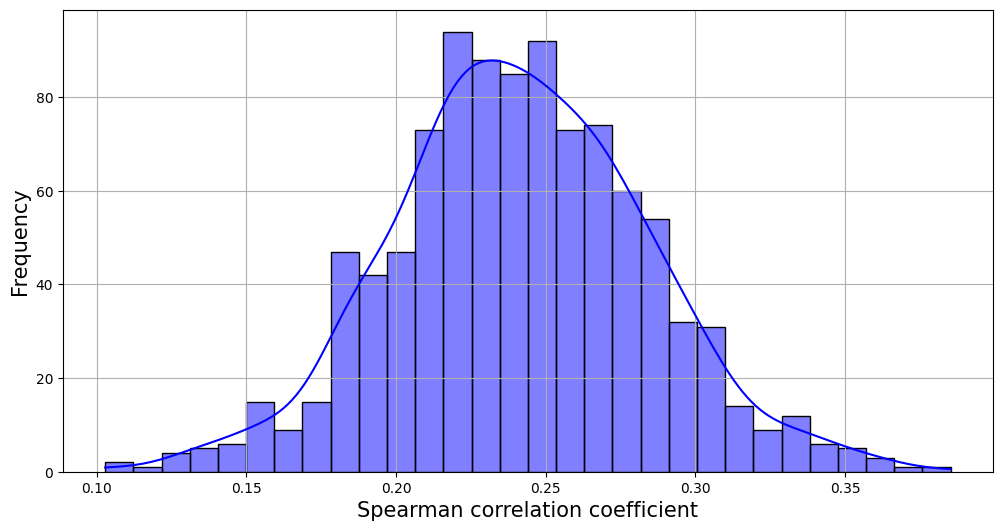

In [12]:
# Load the datasets
df1 = pd.read_csv('High_income_total_damage_per_country_1990_2022.csv')
df2 = pd.read_csv('Upper_middle_income_total_damage_per_country_1990_2022.csv')
df3 = pd.read_csv('Lower_middle_income_total_damage_per_country_1990_2022.csv')
df4 = pd.read_csv('Low_income_total_damage_per_country_1990_2022.csv')


df = pd.concat([df1, df2, df3, df4])

df5 = pd.read_csv('High_income_income_co2_capita_1990_2022.csv')
df6 = pd.read_csv('Upper_middle_income_co2_capita_1990_2022.csv')
df7 = pd.read_csv('Lower_middle_income_co2_capita_1990_2022.csv')
df8 = pd.read_csv('Low_income_co2_capita_1990_2022.csv')

Df = pd.concat([df5, df6, df7, df8])

# Merge the datasets on the 'Entity' column
merged_df = pd.merge(df, Df, on='Entity')

# Select relevant columns and add an income category column
data = merged_df[['Total Damage per Country (\'000 US$)', 'Accumulation CO₂ emissions (per capita)', 'Income_y','Entity']].dropna()


# Calculate Spearman rank correlation
spearman_corr, p_value = spearmanr(data['Accumulation CO₂ emissions (per capita)'], 
                                   data['Total Damage per Country (\'000 US$)'])

# Print the results
print(f"Spearman Rank Correlation: {spearman_corr:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Sensitivity analysis using Monte Carlo simulation
n_iterations = 1000  # Number of Monte Carlo iterations
spearman_coefficients = []

# Perform Monte Carlo simulation
for _ in range(n_iterations):
    # Add random noise to the CO₂ emissions data
    noise = np.random.normal(0, data['Accumulation CO₂ emissions (per capita)'].std() * 0.1, 
                              size=len(data['Accumulation CO₂ emissions (per capita)']))
    perturbed_co2 = data['Accumulation CO₂ emissions (per capita)'] + noise
    
    # Calculate Spearman correlation for perturbed data
    corr, _ = spearmanr(perturbed_co2, data['Total Damage per Country (\'000 US$)'])
    spearman_coefficients.append(corr)

# Analyze the distribution of Spearman coefficients
spearman_coefficients = np.array(spearman_coefficients)

# Plot the distribution of Spearman coefficients
plt.figure(figsize=(12, 6))
sns.histplot(spearman_coefficients, bins=30, kde=True, color='blue')
#plt.title('Distribution of Spearman Correlation Coefficients (Sensitivity Analysis)', fontsize=20)
plt.xlabel('Spearman correlation coefficient', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.savefig('EFD_vs_CO2.png')
#plt.show()

# Summary statistics
mean_corr = np.mean(spearman_coefficients)
std_corr = np.std(spearman_coefficients)
print(f"Mean Spearman Correlation Coefficient: {mean_corr:.4f}")
print(f"Standard Deviation of Spearman Correlation Coefficients: {std_corr:.4f}")

GDP and GHG


Original Spearman Correlation Coefficient: 0.8894199412479845
Original P-value: 4.948878928959342e-46
Mean Spearman Correlation Coefficient: 0.7995057369308071
Standard Deviation of Spearman Correlation Coefficients: 0.021475938419233512


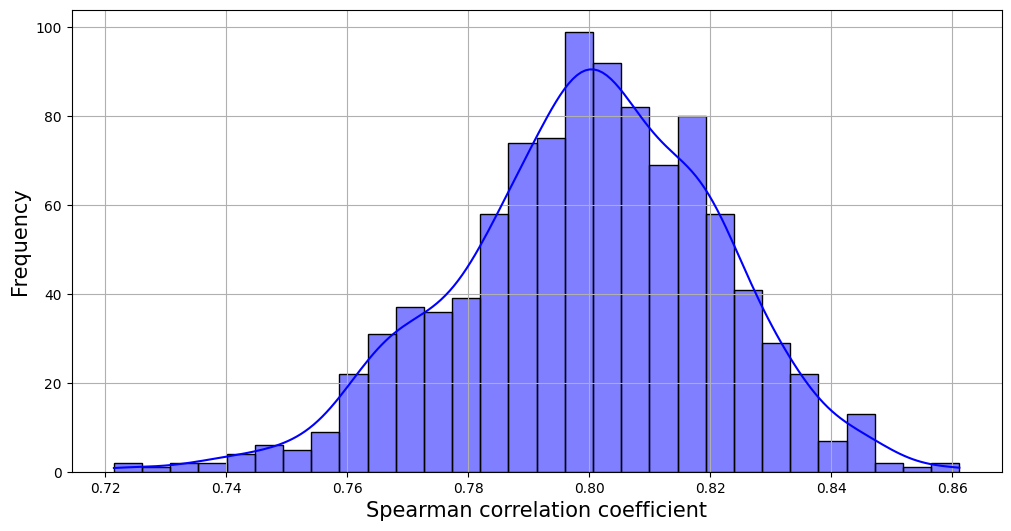

In [4]:
df5 = pd.read_csv('High_income_income_co2_capita_1990_2022.csv')
df6 = pd.read_csv('Upper_middle_income_co2_capita_1990_2022.csv')
df7 = pd.read_csv('Lower_middle_income_co2_capita_1990_2022.csv')
df8 = pd.read_csv('Low_income_co2_capita_1990_2022.csv')

df = pd.concat([df5, df6, df7, df8])

Df= pd.read_csv('Average_gdp.csv')

# Merge the datasets on the 'Entity' column
merged_df = pd.merge(df, Df, on='Entity')

# Select relevant columns and add an income category column
data = merged_df[['GDP', 'Accumulation CO₂ emissions (per capita)', 'Income_y','Entity']].dropna()



# Original data
gdp_data = data['GDP']
co2_data = data['Accumulation CO₂ emissions (per capita)']

# Calculate the original Spearman rank correlation
original_corr, original_p_value = spearmanr(gdp_data, co2_data)
print(f"Original Spearman Correlation Coefficient: {original_corr}")
print(f"Original P-value: {original_p_value}")

# Sensitivity analysis using Monte Carlo simulation
n_iterations = 1000  # Number of Monte Carlo iterations
spearman_coefficients = []

# Perform Monte Carlo simulation
for _ in range(n_iterations):
    # Add random noise to the GDP data
    noise = np.random.normal(0, gdp_data.std() * 0.1, size=len(gdp_data))  # 10% noise
    perturbed_gdp = gdp_data + noise
    
    # Calculate Spearman correlation for perturbed data
    corr, _ = spearmanr(perturbed_gdp, co2_data)
    spearman_coefficients.append(corr)

# Analyze the distribution of Spearman coefficients
spearman_coefficients = np.array(spearman_coefficients)

# Plot the distribution of Spearman coefficients
plt.figure(figsize=(12, 6))
sns.histplot(spearman_coefficients, bins=30, kde=True, color='blue')
#plt.title('Distribution of Spearman rank correlation Coefficients', fontsize=20)
plt.xlabel('Spearman correlation coefficient', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.savefig('Spermean GDP_vs_CO2')
#plt.show()

# Summary statistics
mean_corr = np.mean(spearman_coefficients)
std_corr = np.std(spearman_coefficients)
print(f"Mean Spearman Correlation Coefficient: {mean_corr}")
print(f"Standard Deviation of Spearman Correlation Coefficients: {std_corr}")

EFD and population

Spearman Rank Correlation: 0.5439
P-value: 1.8915e-11
The correlation is statistically significant.
Mean Spearman Correlation Coefficient: 0.4456
Standard Deviation of Spearman Correlation Coefficients: 0.0459


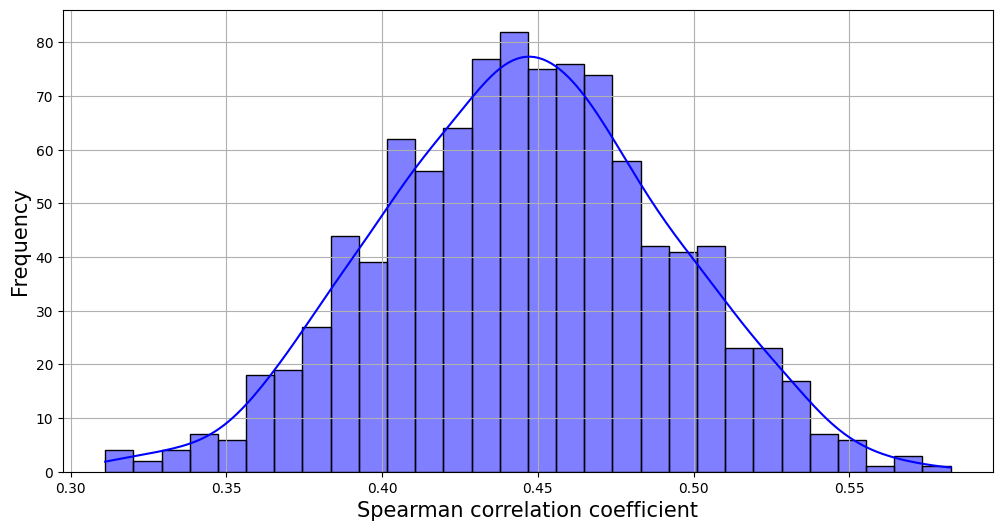

In [4]:
# Load the dataset
data = pd.read_csv('countries_population.csv')


# Calculate Spearman rank correlation
spearman_corr, p_value = spearmanr(data['Population'], 
                                   data['Total Damage per Country (\'000 US$)'])

# Print the results
print(f"Spearman Rank Correlation: {spearman_corr:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Sensitivity analysis using Monte Carlo simulation
n_iterations = 1000  # Number of Monte Carlo iterations
spearman_coefficients = []

# Perform Monte Carlo simulation
for _ in range(n_iterations):
    # Add random noise to the GDP data
    noise = np.random.normal(0, data['Population'].std() * 0.1, 
                              size=len(data['Population']))
    perturbed_gdp = data['Population'] + noise
    
    # Calculate Spearman correlation for perturbed data
    corr, _ = spearmanr(perturbed_gdp, data['Total Damage per Country (\'000 US$)'])
    spearman_coefficients.append(corr)

# Analyze the distribution of Spearman coefficients
spearman_coefficients = np.array(spearman_coefficients)

# Plot the distribution of Spearman coefficients
plt.figure(figsize=(12, 6))
sns.histplot(spearman_coefficients, bins=30, kde=True, color='blue')
plt.xlabel('Spearman correlation coefficient', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.savefig('Population_vs_Damage.png')

# Summary statistics
mean_corr = np.mean(spearman_coefficients)
std_corr = np.std(spearman_coefficients)
print(f"Mean Spearman Correlation Coefficient: {mean_corr:.4f}")
print(f"Standard Deviation of Spearman Correlation Coefficients: {std_corr:.4f}")